In [1]:
import pandas as pd


df = pd.read_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\sierraleone-bumbuna.csv')



print(df.head())


          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.1  0.0     0.0   
1  2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
2  2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.2  0.0     0.0   
3  2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   
4  2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9  99.3  0.0     0.0   

   WSstdev   WD  WDstdev    BP  Cleaning  Precipitation  TModA  TModB  \
0      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
1      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
2      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   
3      0.0  0.0      0.0  1002         0            0.1   22.3   22.6   
4      0.0  0.0      0.0  1002         0            0.0   22.3   22.6   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  


In [2]:

print("Dataset Shape:", df.shape)

print("Columns:", df.columns)

print("Missing Values per Column:")
print(df.isna().sum())


Dataset Shape: (525600, 19)
Columns: Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [3]:
threshold = len(df) * 0.05
missing_cols = [col for col in df.columns if df[col].isna().sum() > threshold]
print("Columns with >5% nulls:", missing_cols)


Columns with >5% nulls: ['Comments']


In [4]:
for col in ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']:
    df[col] = df[col].fillna(df[col].median())
print("Missing Values after Imputation:")

Missing Values after Imputation:


In [5]:
print(df.isna().sum())

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [6]:
# Check for missing values in all columns
missing_values = df.isna().sum()
print("Missing Values per Column:")
print(missing_values)

# Identify columns with significant missing data (>5%)
threshold = len(df) * 0.05  # 5% threshold
columns_with_missing = missing_values[missing_values > threshold]
print("\nColumns with >5% Missing Values:")
print(columns_with_missing)

Missing Values per Column:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns with >5% Missing Values:
Comments    525600
dtype: int64


In [7]:
# Drop rows with missing values in critical columns
critical_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
df_cleaned = df.dropna(subset=critical_columns).copy()

# Impute missing values in non-critical columns with the median
for col in df_cleaned.columns:
    if col not in critical_columns and df_cleaned[col].isna().sum() > 0:
        median_value = df_cleaned[col].median()
        if not pd.isna(median_value):  # Avoid using median of empty column
            df_cleaned[col] = df_cleaned[col].fillna(median_value)

# Verify that missing values are handled
print("Missing Values After Cleaning:")
print(df_cleaned.isna().sum())



Missing Values After Cleaning:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


c:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


Number of Outlier Rows: 16292
Dataset Shape before Removing Outliers: (525600, 19)
Dataset Shape After Removing Outliers: (509308, 19)


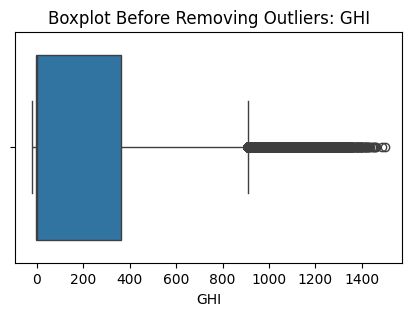

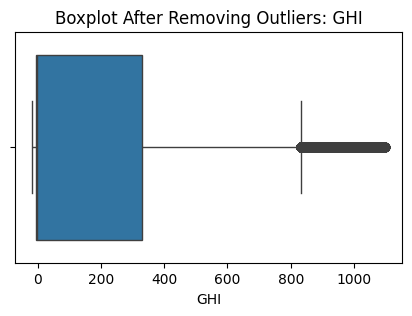

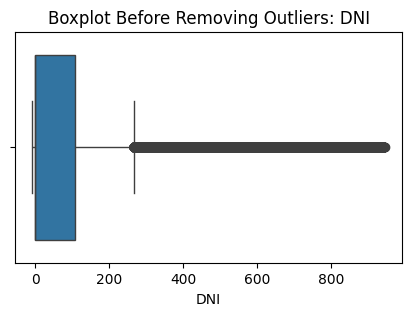

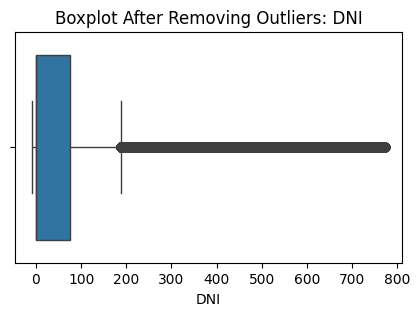

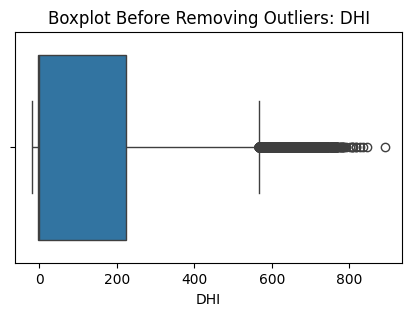

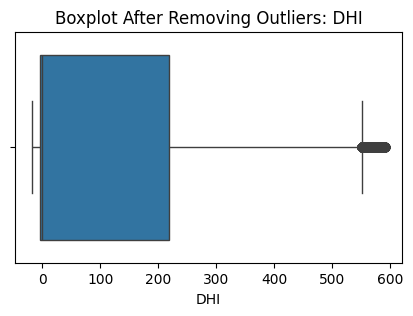

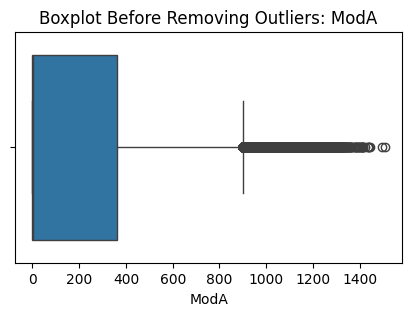

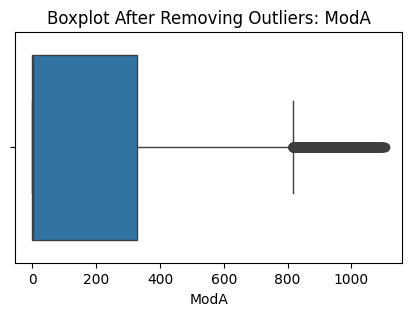

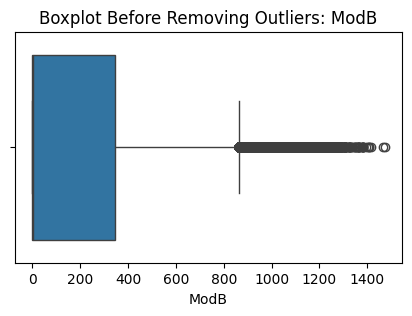

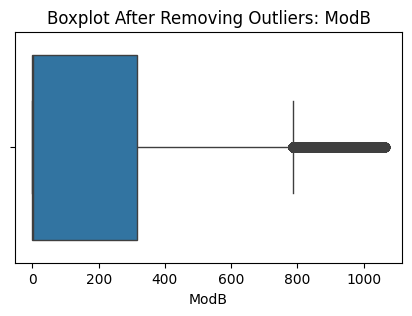

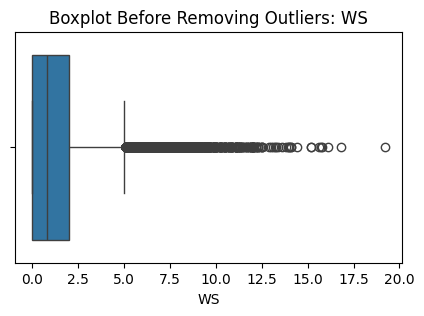

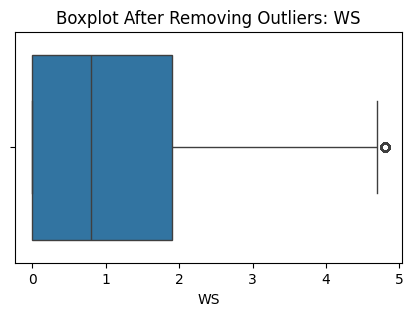

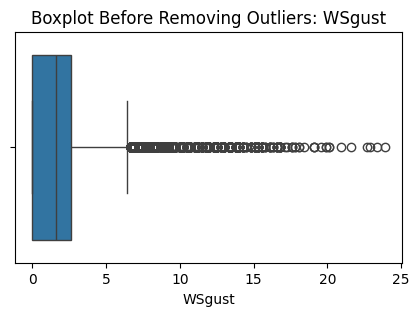

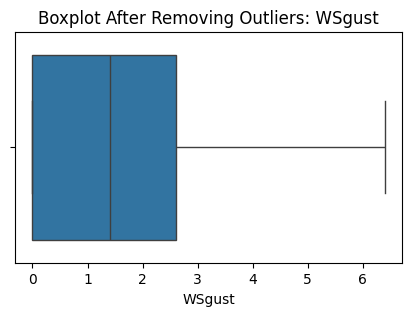

In [12]:
import pandas as pd
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Step 1: Check for outliers using Z-scores
z_scores = df_cleaned[numeric_columns].apply(zscore)


# Step 4: Create a boolean mask for outliers
outliers = (z_scores.abs() > 3).any(axis=1)

# Explanation:
# - z_scores.abs() > 3 gives True wherever |Z| > 3
# - .any(axis=1) checks if **any** column in that row is an outlier
# - So, outliers is a boolean Series: True = row has at least one outlier

# Step 5: Print how many outlier rows there are
print("Number of Outlier Rows:", outliers.sum())

# Step 6: Remove the outliers
df_no_outliers = df_cleaned[~outliers]

# Explanation:
# - `~outliers` means NOT outliers, i.e., we keep rows that are not flagged
# - df_no_outliers is your cleaned dataset without extreme values

# Step 7: Show the shape after cleaning
print("Dataset Shape before Removing Outliers:", df.shape)
print("Dataset Shape After Removing Outliers:", df_no_outliers.shape)

# Step 8: Optional — Visualize outliers using boxplots
for col in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot Before Removing Outliers: {col}')
    plt.show()

    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_no_outliers[col])
    plt.title(f'Boxplot After Removing Outliers: {col}')
    plt.show()


In [13]:
# Check for negative or unrealistic values in key columns
invalid_entries = {
    'Negative GHI': (df_cleaned['GHI'] < 0).sum(),
    'Negative DNI': (df_cleaned['DNI'] < 0).sum(),
    'Negative DHI': (df_cleaned['DHI'] < 0).sum(),
    'Negative WS': (df_cleaned['WS'] < 0).sum(),
    'Negative WSgust': (df_cleaned['WSgust'] < 0).sum(),
}

print("Invalid Entries:")
for key, value in invalid_entries.items():
    print(f"{key}: {value}")

# Remove rows with invalid entries
df_cleaned = df_cleaned[(df_cleaned['GHI'] >= 0) & 
                        (df_cleaned['DNI'] >= 0) & 
                        (df_cleaned['DHI'] >= 0) & 
                        (df_cleaned['WS'] >= 0) & 
                        (df_cleaned['WSgust'] >= 0)]

# Verify the cleaned dataset
print("Dataset Shape After Removing Invalid Entries:", df_cleaned.shape)

Invalid Entries:
Negative GHI: 261135
Negative DNI: 266352
Negative DHI: 263128
Negative WS: 0
Negative WSgust: 0
Dataset Shape After Removing Invalid Entries: (238872, 19)


In [14]:
df_cleaned.to_csv(r'C:\Users\dagi\OneDrive\Desktop\Kifiya\solar-challenge-week1\data\sierraleone-bumbuna_clean.csv', index=False)
